In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv('HousingData.csv')

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# - CRIM - per capita crime rate by town
# - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# - INDUS - proportion of non-retail business acres per town.
# - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# - NOX - nitric oxides concentration (parts per 10 million)
# - RM - average number of rooms per dwelling
# - AGE - proportion of owner-occupied units built prior to 1940
# - DIS - weighted distances to five Boston employment centres
# - RAD - index of accessibility to radial highways
# - TAX - full-value property-tax rate per $10,000
# - PTRATIO - pupil-teacher ratio by town
# - B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# - LSTAT - % lower status of the population
# - MEDV - Median value of owner-occupied homes in $1000's

In [7]:
df.shape

(506, 14)

In [9]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [13]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [16]:
df.isnull().sum().sum()

np.int64(0)

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [18]:
x = df.drop(columns='MEDV')
y = df['MEDV']

In [20]:
ss = StandardScaler()

In [21]:
x_scaled = ss.fit_transform(x)

In [36]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=1)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [43]:
knn = KNeighborsRegressor(n_neighbors=5)

In [44]:
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [45]:
y_pred_test = knn.predict(x_test)

In [47]:
y_pred_train = knn.predict(x_train)

In [48]:
print(f"your r2 score by KNN regression on training is {r2_score(y_train,y_pred_train)}")

your r2 score by KNN regression on training is 0.8160800666310777


In [49]:
print(f"your r2 score by KNN regression on testing is {r2_score(y_test,y_pred_test)}")

your r2 score by KNN regression on testing is 0.7916332975478237


In [51]:
scores={}
scores_t={}

for i in range(1,16):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    y_pred_train=knn.predict(x_train)
    scores[i]=r2_score(y_test,y_pred)
    scores_t[i]=r2_score(y_train,y_pred_train)

print(scores)
print(scores_t)


{1: 0.829000726862365, 2: 0.819026414078753, 3: 0.8028101713840102, 4: 0.8015128372475648, 5: 0.7916332975478237, 6: 0.7710427834725618, 7: 0.7622446284968405, 8: 0.7567223620642114, 9: 0.7531710168183596, 10: 0.7423505499162731, 11: 0.7476303809905767, 12: 0.7504454219465077, 13: 0.750809336578979, 14: 0.7509109583789798, 15: 0.7510680698590827}
{1: 1.0, 2: 0.9076510725158081, 3: 0.8767430460936393, 4: 0.845350814612749, 5: 0.8160800666310777, 6: 0.7926146631063028, 7: 0.7837034870869285, 8: 0.7736367129607524, 9: 0.757792232868038, 10: 0.7523556787357826, 11: 0.7469591778439594, 12: 0.7398366862105678, 13: 0.733948373283152, 14: 0.7290023891756929, 15: 0.7278695777393799}


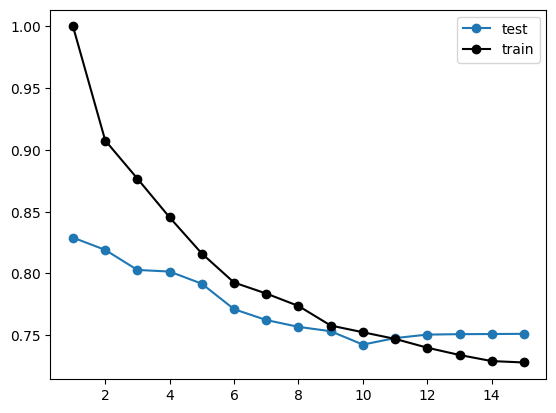

In [52]:
plt.plot(scores.keys(),scores.values(),marker='o',label='test')
plt.plot(scores_t.keys(),scores_t.values(),marker='o',color='k',label='train')
plt.legend();